In [1]:
import matplotlib
import loadnotebook
from helper import * 

importing Jupyter notebook from helper.ipynb


In [2]:
priority = 6
set_value = 5
expected_total_point = 291
source = get_source(priority, set_value)

output_csv = "../results/demo_priority_" + str(priority) + "/set" + str(set_value) + ".csv"

def get_output_image(prefix="") :
    return "../results/demo_priority_" + str(priority) + "/images/set" + \
            str(set_value) + "_" + prefix + ".png"

In [6]:
result = extract_data(config={priority : [set_value]}, feature=True, pure=False)

helper.ipynb:570: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  "\n",


RSRP not found ../data/demo-priority6/set5/Reed/139/18Aug22_091649 139.1.nmf
RSRP not found ../data/demo-priority6/set5/Peter/133/A_18Aug22_091045-133.1.nmf


In [4]:
total_point = len(result.groupby(["location_x", "location_y"]).agg(['count']))
print("total point : ", total_point)

# because set 1 we have't rename the folder based on location number
# this block only work for priority 6 set > 2
if total_point < expected_total_point and priority == 6 and set_value != 1 :
    d = {}
    source = get_source(priority, set_value)
    filenames, _ = get_filenames(source)
    for f in filenames : 
        d[int(f.split("/")[-2])]=f
        
    missing_point = []
    arr = np.arange(expected_total_point)
    for a in arr :
        if a not in d :
            missing_point.append(a)
    
    print("missing point : ", missing_point)

total point :  195
missing point :  [8, 11, 14, 17, 20, 23, 25, 29, 32, 35, 38, 41, 45, 49, 51, 54, 56, 59, 62, 65, 68, 71, 126, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282]


In [8]:
result.to_csv(output_csv, index=False)

In [7]:
result

,location_x,location_y,PCI,RSRP,RSRQ,SNR,timestamp,filename,Power_37,Power_38,...,Distance_39,Distance_40,Distance_41,Distance_42,Angle_37,Angle_38,Angle_39,Angle_40,Angle_41,Angle_42
0,882.0,150.0,42.0,-68.3,-6.1,28.3,14:37:02.830,84.mrk,-3,-3,...,635.561169,255.894510,400.000000,222.733024,8,5,4,4,5,4
1,882.0,150.0,42.0,-68.3,-6.1,29.6,14:37:03.199,84.mrk,-3,-3,...,635.561169,255.894510,400.000000,222.733024,8,5,4,4,5,4
2,882.0,150.0,42.0,-68.2,-7.4,29.0,14:37:03.701,84.mrk,-3,-3,...,635.561169,255.894510,400.000000,222.733024,8,5,4,4,5,4
3,882.0,150.0,42.0,-67.8,-5.8,28.9,14:37:04.252,84.mrk,-3,-3,...,635.561169,255.894510,400.000000,222.733024,8,5,4,4,5,4
4,882.0,150.0,42.0,-68.6,-6.1,29.1,14:37:04.763,84.mrk,-3,-3,...,635.561169,255.894510,400.000000,222.733024,8,5,4,4,5,4
5,882.0,150.0,42.0,-69.9,-6.3,29.8,14:37:05.274,84.mrk,-3,-3,...,635.561169,255.894510,400.000000,222.733024,8,5,4,4,5,4
6,882.0,150.0,42.0,-70.5,-6.1,29.6,14:37:05.768,84.mrk,-3,-3,...,635.561169,255.894510,400.000000,222.733024,8,5,4,4,5,4
7,882.0,150.0,42.0,-69.6,-5.8,29.8,14:37:06.331,84.mrk,-3,-3,...,635.561169,255.894510,400.000000,222.733024,8,5,4,4,5,4
8,882.0,150.0,42.0,-70.4,-6.1,29.7,14:37:06.878,84.mrk,-3,-3,...,635.561169,255.894510,400.000000,222.733024,8,5,4,4,5,4
9,882.0,150.0,42.0,-70.3,-6.1,29.6,14:37:07.308,84.mrk,-3,-3,...,635.561169,255.894510,400.000000,222.733024,8,5,4,4,5,4


### PCI Map    

In [9]:
pci_color_dict

{37: (0, 0, 255),
 38: (0, 255, 0),
 39: (255, 0, 0),
 40: (135, 206, 250),
 41: (255, 165, 0),
 42: (255, 160, 122),
 62: (165, 42, 42)}

[ 39  40  38  41  62  37  42   1 151 120 154]


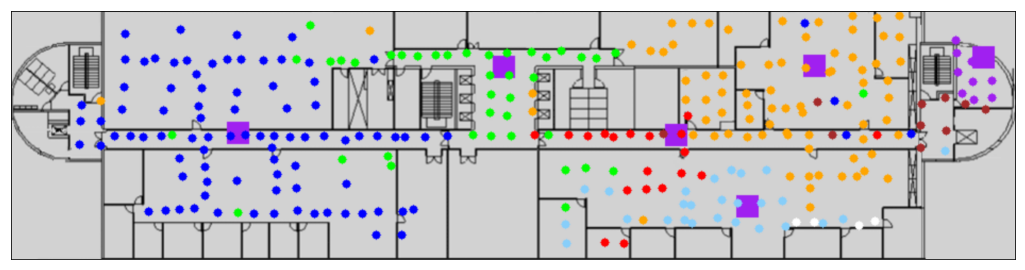

In [25]:
df = result.dropna(subset=["PCI"])
lon_list = df["location_x"].astype('int32')
lat_list = df["location_y"].astype('int32')
pci_list = df["PCI"].astype('int32')
print(df.PCI.unique())

new_format=True
new_backtorgb = get_map_image(new_format=new_format)
pci_color = [pci_color_dict[x] if x in pci_color_dict else (255, 255, 255) for x in pci_list]
new_backtorgb = visualize(new_backtorgb, lon_list, lat_list, pci_color, 
                          get_output_image("pci"), adjustment=new_format)

### RSRP Location Map    

In [10]:
df = result.dropna(subset=["RSRQ"])
lon_list = df["location_x"].astype('int32')
lat_list = df["location_y"].astype('int32')
rsrp_list = df["RSRP"].astype('int32')

rsrp_summary = summary_based_on_location(lat_list, lon_list, rsrp_list)
rsrp_summary = summary_dict(rsrp_summary, np.array)

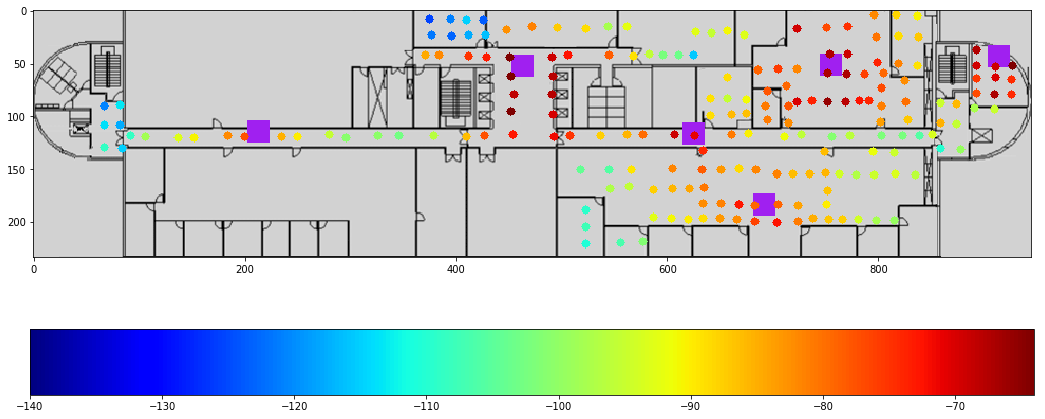

In [11]:
normalize_rsrp_mean = matplotlib.colors.Normalize(vmin=-140, vmax=-64)
rsrp_mean = summary_dict(rsrp_summary, np.mean)
x_list, y_list, rsrp_mean_list = summary_dict_to_list(rsrp_mean)
colors_rsrp_mean = [cmap(normalize_rsrp_mean(value))[:3] for value in rsrp_mean_list]
colors_rsrp_mean = [[int(x*255) for x in value] for value in colors_rsrp_mean]

new_backtorgb = get_map_image()
new_backtorgb = visualize_cmap(new_backtorgb, x_list, y_list, colors_rsrp_mean, 
                               cmap, normalize_rsrp_mean, get_output_image("rsrp_mean"))

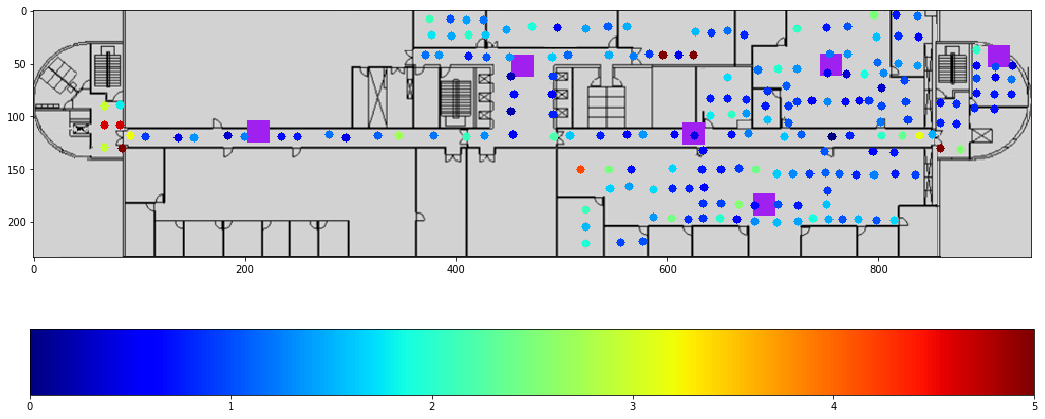

In [12]:
normalize_rsrp_std = matplotlib.colors.Normalize(vmin=0, vmax=5)
rsrp_std = summary_dict(rsrp_summary, np.std)
x_list, y_list, rsrp_std_list = summary_dict_to_list(rsrp_std)
colors_rsrp_std = [cmap(normalize_rsrp_std(value))[:3] for value in rsrp_std_list]
colors_rsrp_std = [[int(x*255) for x in value] for value in colors_rsrp_std]

new_backtorgb = get_map_image()
new_backtorgb = visualize_cmap(new_backtorgb, x_list, y_list, colors_rsrp_std, 
                               cmap, normalize_rsrp_std, get_output_image("rsrp_std"))

### RSRQ Location Map     

In [23]:
df = result.dropna(subset=["RSRQ"])
lon_list = df["location_x"].astype('int32')
lat_list = df["location_y"].astype('int32')
rsrq_list = df["RSRQ"].astype('int32')

rsrq_summary = summary_based_on_location(lat_list, lon_list, rsrq_list)
rsrq_summary = summary_dict(rsrq_summary, np.array)

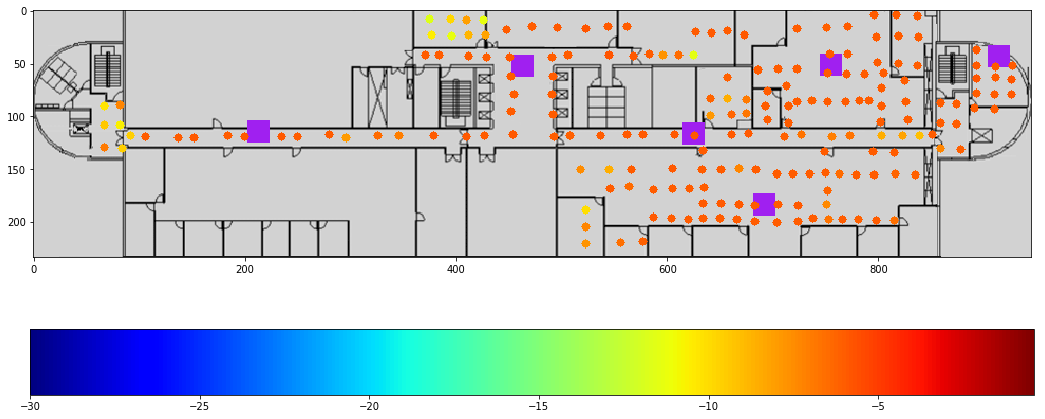

In [25]:
normalize_rsrq_mean = matplotlib.colors.Normalize(vmin=-30, vmax=-0.4)
rsrq_mean = summary_dict(rsrq_summary, np.mean)
x_list, y_list, rsrq_mean_list = summary_dict_to_list(rsrq_mean)
colors_rsrq_mean = [cmap(normalize_rsrq_mean(value))[:3] for value in rsrq_mean_list]
colors_rsrq_mean = [[int(x*255) for x in value] for value in colors_rsrq_mean]

new_backtorgb = get_map_image()
new_backtorgb = visualize_cmap(new_backtorgb, x_list, y_list, colors_rsrq_mean,
                               cmap, normalize_rsrq_mean, get_output_image("rsrq_mean"))

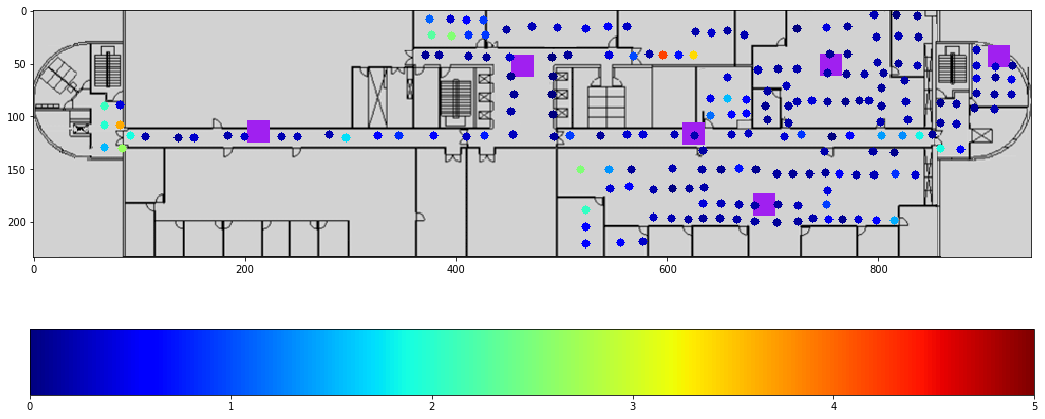

In [15]:
normalize_rsrq_std = matplotlib.colors.Normalize(vmin=0, vmax=5)
rsrq_std = summary_dict(rsrq_summary, np.std)
x_list, y_list, rsrq_std_list = summary_dict_to_list(rsrq_std)
colors_rsrq_std = [cmap(normalize_rsrq_std(value))[:3] for value in rsrq_std_list]
colors_rsrq_std = [[int(x*255) for x in value] for value in colors_rsrq_std]

new_backtorgb = get_map_image()
new_backtorgb = visualize_cmap(new_backtorgb, x_list, y_list, colors_rsrq_std,
                               cmap, normalize_rsrq_std, get_output_image("rsrq_std"))

### SNR Location Map    

In [26]:
df = result.dropna(subset=["SNR"])
lon_list = df["location_x"].astype('int32')
lat_list = df["location_y"].astype('int32')
snr_list = df["SNR"].astype('int32')

snr_summary = summary_based_on_location(lat_list, lon_list, snr_list)
snr_summary = summary_dict(snr_summary, np.array)

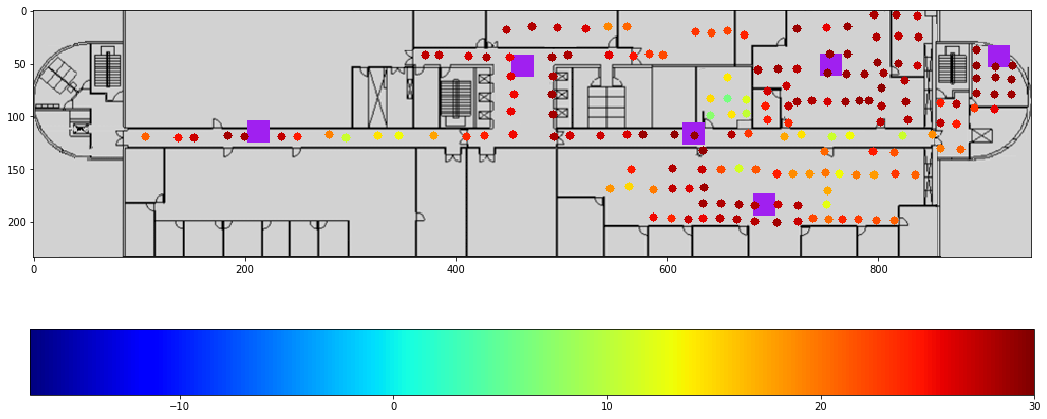

In [27]:
normalize_snr_mean = matplotlib.colors.Normalize(vmin=-17, vmax=30)
snr_mean = summary_dict(snr_summary, np.mean)
x_list, y_list, snr_mean_list = summary_dict_to_list(snr_mean)
colors_snr_mean = [cmap(normalize_snr_mean(value))[:3] for value in snr_mean_list]
colors_snr_mean = [[int(x*255) for x in value] for value in colors_snr_mean]

new_backtorgb = get_map_image()
new_backtorgb = visualize_cmap(new_backtorgb, x_list, y_list, colors_snr_mean,
                               cmap, normalize_snr_mean, get_output_image("snr_mean"))

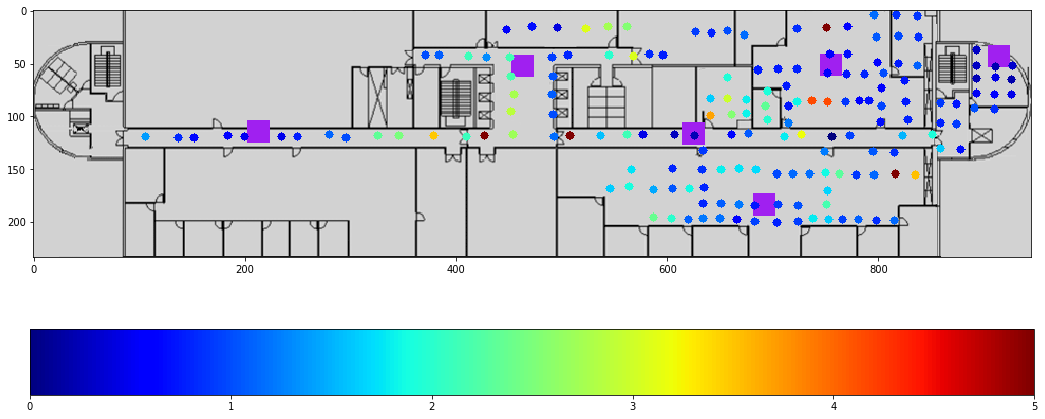

In [28]:
normalize_snr_std = matplotlib.colors.Normalize(vmin=0, vmax=5)
snr_std = summary_dict(snr_summary, np.std)
x_list, y_list, snr_std_list = summary_dict_to_list(snr_std)
colors_snr_std = [cmap(normalize_snr_std(value))[:3] for value in snr_std_list]
colors_snr_std = [[int(x*255) for x in value] for value in colors_snr_std]

new_backtorgb = get_map_image()
new_backtorgb = visualize_cmap(new_backtorgb, x_list, y_list, colors_snr_std, 
                               cmap, normalize_snr_std, get_output_image("snr_std"))

# Merge All Summary 

In [8]:
# df_summary = collect_df(["../results/demo_priority_1/*.csv", 
#                          "../results/demo_priority_2/*.csv", 
#                          "../results/demo_priority_3/*.csv", 
#                          "../results/demo_priority_4/*.csv"])
df_summary = collect_df(["../results/demo_priority_6/*.csv"])

helper.ipynb:163: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  "\n",


In [9]:
print(df_summary.PCI.unique())
# df_summary = df_summary[df_summary["PCI"].isin(whitelist_PCI)]
# print(df_summary.PCI.unique())

[ 38.  39.  37.  40.  41.  42. 247.  62.   1. 151. 154. 120.   2.]


In [14]:
df_summary

,location_x,location_y,PCI,RSRP,RSRQ,SNR,timestamp,filename,Power_37,Power_38,...,Distance_40,Distance_41,Distance_42,Angle_37,Angle_38,Angle_39,Angle_40,Angle_41,Angle_42,setname
0,494.0,175.0,38.0,-91.4,-6.3,24.3,11:21:55.503,35.mrk,-3,-3,...,222.748737,261.296766,409.414216,4,6,1,1,8,8,demo_priority_6/set5.csv
1,494.0,175.0,38.0,-90.7,-6.5,23.6,11:21:56.096,35.mrk,-3,-3,...,222.748737,261.296766,409.414216,4,6,1,1,8,8,demo_priority_6/set5.csv
2,494.0,175.0,38.0,-89.4,-6.3,21.1,11:21:56.738,35.mrk,-3,-3,...,222.748737,261.296766,409.414216,4,6,1,1,8,8,demo_priority_6/set5.csv
3,494.0,175.0,38.0,-91.1,-6.7,15.1,11:21:57.279,35.mrk,-3,-3,...,222.748737,261.296766,409.414216,4,6,1,1,8,8,demo_priority_6/set5.csv
4,494.0,175.0,38.0,-90.9,-6.8,11.2,11:21:57.873,35.mrk,-3,-3,...,222.748737,261.296766,409.414216,4,6,1,1,8,8,demo_priority_6/set5.csv
5,494.0,175.0,38.0,-89.1,-6.3,18.0,11:21:58.485,35.mrk,-3,-3,...,222.748737,261.296766,409.414216,4,6,1,1,8,8,demo_priority_6/set5.csv
6,494.0,175.0,38.0,-89.2,-6.1,18.5,11:21:58.969,35.mrk,-3,-3,...,222.748737,261.296766,409.414216,4,6,1,1,8,8,demo_priority_6/set5.csv
7,494.0,175.0,38.0,-89.3,-6.6,17.0,11:21:59.552,35.mrk,-3,-3,...,222.748737,261.296766,409.414216,4,6,1,1,8,8,demo_priority_6/set5.csv
8,494.0,175.0,38.0,-90.1,-6.7,13.5,11:21:59.918,35.mrk,-3,-3,...,222.748737,261.296766,409.414216,4,6,1,1,8,8,demo_priority_6/set5.csv
9,494.0,175.0,38.0,-88.1,-6.3,16.1,11:22:00.586,35.mrk,-3,-3,...,222.748737,261.296766,409.414216,4,6,1,1,8,8,demo_priority_6/set5.csv


In [11]:
print(df_summary.setname.unique())

['demo_priority_6/set5.csv' 'demo_priority_6/set16.csv'
 'demo_priority_6/set15.csv' 'demo_priority_6/set33.csv'
 'demo_priority_6/set14.csv' 'demo_priority_6/set2.csv'
 'demo_priority_6/set1.csv' 'demo_priority_6/set4.csv'
 'demo_priority_6/set3.csv']


In [12]:
columns = ["location_x", "location_y", "PCI", "RSRP", "RSRQ", "SNR", "timestamp", "filename", 
           'Power_301', 'Power_302',
           '301_beam0', '301_beam32', '301_beam64', '301_beam96', '301_beam128',
           '302_beam0', '302_beam32', '302_beam64', '302_beam96', '302_beam128', 
           'Distance_301', 'Distance_302', 'Angle_301', 'Angle_302', 'setname']

In [15]:
df_summary.to_csv("../results/summary.csv", index=False)

# Generating Small Cell Position 

In [2]:
mrk_filenames, _ = get_filenames("../alpha_small_cell")

In [4]:
locations = [extract_mrk(f) for f in mrk_filenames]

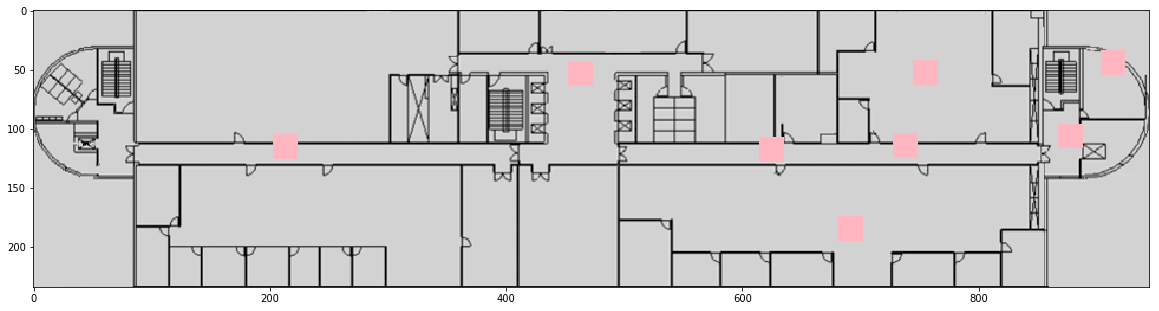

In [7]:
plt.figure(figsize=(20, 10))
plt.imshow(get_map_image())

## Playground 

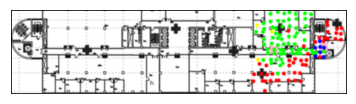

In [68]:
old_origin_img = cv2.imread('../image/map.png',0)
crop = old_origin_img[100:318, 50:927]
crop = cv2.cvtColor(crop, cv2.COLOR_GRAY2RGB)

for bs in bs_location :
    x, y = bs_location[bs]
    x, y = int(x)-50, int(y)-100
    d = 10
    top_left = (x-d, y+d)
    bottom_right = (x+d, y-d)
    new_backtorgb = cv2.rectangle(crop, top_left, bottom_right, (255,182,193), -1)
    
for lat, lon, pci in zip(lat_list, lon_list, pci_list) :
    colour = pci_dict[pci]
    new_backtorgb = cv2.circle(crop, (lon-50, lat-100), 5, colour, -1)

plt.imshow(crop, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

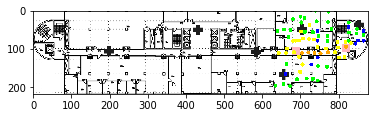

In [305]:
old_origin_img = cv2.imread('../image/map.png',0)
crop = old_origin_img[100:318, 50:927]
crop = cv2.cvtColor(crop, cv2.COLOR_GRAY2RGB)

for bs in bs_location :
    x, y = bs_location[bs]
    x, y = int(x)-50, int(y)-100
    d = 10
    top_left = (x-d, y+d)
    bottom_right = (x+d, y-d)
    new_backtorgb = cv2.rectangle(crop, top_left, bottom_right, (255,182,193), -1)
    
for lat in rsrp_summary_mean:
    for lon in rsrp_summary_mean[lat] :
        val = rsrp_summary_mean[lat][lon]
        colour = get_rsrp_color(val)
        new_backtorgb = cv2.circle(crop, (lon-50, lat-100), 5, colour, -1)
        
plt.imshow(new_backtorgb)

In [42]:
old_origin_img = cv2.imread('../image/map.png',0)
crop = old_origin_img[100:318, 50:927]
crop = cv2.cvtColor(crop, cv2.COLOR_GRAY2RGB)

# put a red dot, size 40, at 2 locations:
x_plot = [x-50 for x in x_list]
y_plot = [y-100 for y in y_list]
sctr = plt.scatter(x=x_plot, y=y_plot, c=rsrp_mean_list, cmap='RdYlGn')

fig = plt.figure(figsize=(18,10))
plt.colorbar(sctr)
plt.imshow(crop)
plt.show()

NameError: name 'x_list' is not defined

In [18]:
total_502 = []
total_503 = []
total_505 = []
other = []
for x, y in zip(lon_list, lat_list) :
    if 100 < y and y < 205 and 680 < x and x < 845:
        total_505.append((x, y))
    elif 125 < y and y < 183 and 845 < x and x < 927:
        total_503.append((x, y))
    elif 218 < y and y < 318 and 680 < x and x < 845:
        total_502.append((x, y))
    else :
        other.append((x, y))

In [6]:
def filter(datum) :
    x = datum["location_x"]
    y = datum["location_y"]
    if 100 < y and y < 170 and 830 < x and x < 870:
        datum["room"] = "stairs"
    elif 100 < y and y < 205 and 680 < x and x < 845:
        datum["room"] = "505"
    elif 125 < y and y < 183 and 845 < x and x < 927:
        datum["room"] = "503"
    elif 218 < y and y < 318 and 680 < x and x < 845:
        datum["room"] = "502"
    else :
        datum["room"] = "other"
    
    return datum

In [7]:
r = result[["location_x", "location_y", "filename"]]
r = r.drop_duplicates()
r = r.apply(lambda x : filter(x), axis=1)

In [8]:
temp = r[r["room"] == "stairs"]

In [9]:
temp

,location_x,location_y,filename,room
0,867.0,151.0,18Aug02_142959.1.nmf,stairs


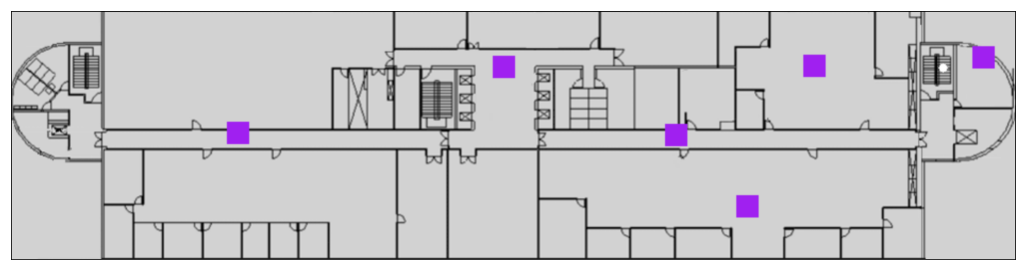

In [10]:
new_format=True
new_backtorgb = get_map_image(new_format=new_format)
pci_color = [(255, 255, 255)] * len(temp)
new_backtorgb = visualize(new_backtorgb, temp["location_x"], temp["location_y"], pci_color, 
                          None, adjustment=new_format)

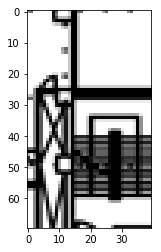

In [26]:
x_cut = 830  
y_cut = 100 

old_origin_img = cv2.imread('../image/map.png',0)
crop = old_origin_img[y_cut:170, x_cut:870]
crop = cv2.cvtColor(crop, cv2.COLOR_GRAY2RGB)
plt.imshow(crop)